# Example from Image Processing


<div class="alert alert-block alert-success">

In this notebook we are going to build an image classifier using a pre-labelled dataset. Specifically, we'll take a look at a simple facial recognition example. This means we have a set of images that we want to predict the label of, and that label has already been provided to us. 
    
 - 1) [Introduction to classification in Machine learning](#Introduction)
 - 2) [The dataset](#dataset)
 - 3) [Preprocessing: Reducing the number of input dimensions](#Preprocessing)
 - 4) [Training the classifier](#Training)
 
There is no exercise asspociated with this notebook, rather the preceeding notebook 'image_recognition_images' asks that you repeat what is done in this notebook but with images of animals. However do feel free to modify this notebook and ask for any help in doing so. Please do read through the steps given. Even though the code presented may seem new and difficult, the aim is to get a broader feel for the steps associated with loading data and training a classifer as we discuss in the associated lecture with this practical. 

</div>

## 1) Introduction to classification in Machine learning <a name="Introduction"></a>

Where do we begin?? Well, as we discuss in the lecture, we can break this down into the main goal behind classification: Given an image, can we classify the entire image or components of that image into distinct objects?


<div>
<img src="..\images\matlab_example.jpg" width="700"/>
</div>

In the image above [(source Mathworks)](https://www.mathworks.com/solutions/deep-learning/convolutional-neural-network.html), we see an example of having multiple images of cars, loading the data and breaking it down into features, and then using those features to train a classifier to accurately identify objects. As with any scientific experiment, we would like to have as much data as possible. It is worthwhile recognising however that with the amount of data required, or needed, the architecture of our classifier would need to change. We cover this briefly in the lecture content for this practical. In this notebook we will practise moving from the left to the right hand side of the figure.

## 2) The dataset <a name="dataset"></a>

Where we can find an existing labelled dataset of labelled faces that isnt subject to any ethical considerations?

In this example we might use a dataset consisting of a subset of the [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/) data that is available within [scikit-learn](https://scikit-learn.org/stable/) package, which you will have used in the first year programming module. We can access this dataset using the ```datasets.fetch_lfw_people``` function. However, this is a relatively large download (~200MB) so we will do the tutorial on a simpler, less rich dataset known as the Olivetti faces dataset. In the following we import the modules we need for the first example and then download this labelled dataset.

What is the [Olivetti faces dataset?](https://scikit-learn.org/0.19/datasets/olivetti_faces.html). If you click on this link you will find that this dataset contains a set of face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. The sklearn.datasets.fetch_olivetti_faces function is the data fetching / caching function that downloads the data archive from AT&T. As described on the original website, and with due credit given to AT&T Laboratories Cambridge:

 - There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).The image is quantized to 256 grey levels and stored as unsigned 8-bit integers; the loader will convert these to floating point values on the interval [0, 1], which are easier to work with for many algorithms.


*Source:* [Course on machine learning with scikit-learn](https://github.com/GaelVaroquaux/sklearn_ensae_course) by Gaël Varoquaux



In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np

faces = datasets.fetch_olivetti_faces()

# The following access the shape of the data arrays within the faces dataset
faces.data.shape
# The output may seem confusing, but these number represent the number of images in our dataset [400] and
# the size of an array that contains the pixels for an original image of 64 x 64 pixels

(400, 4096)

In [3]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

Give we are working with images, it would be nice to take a look at them. Let's visualize these faces to see what we're working with. The following code sets up a figure canvas and then plots the pixel information for each image, in the 64 x 64 format, in subplots. The function ``` ax.imshow ``` is an internal matplotlib function to create a 2D plot.

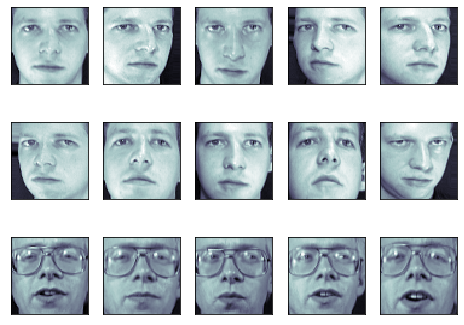

In [4]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

So now we have the images, what about the labels? As noted above we are using numeric labels rather than names. We can take a look at this information by simply printing out the array which will give us a rather mundane array with 400 entries ranging from 0 - 39 [remember Python indexing starts at 0!]:

In [5]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

Now we have the data, how do we train and validate a classifier? We need to create a seperate training and test set and the following code does that using an internal function within the Scikit learn framework. Using the default settings this gives us 300 images for training and 100 images for testing. 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


We can take a quick look at how some of the variables have been assigned to different images below:

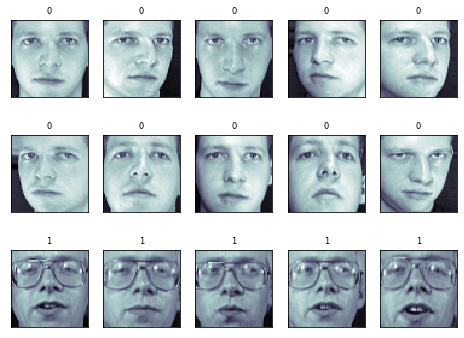

In [7]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.data[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    ax.set_title(faces.target[i],
                 fontsize='small', color='black')

## 3) Preprocessing: Reducing the number of input dimensions <a name="Preprocessing"></a>

As we briefly discuss in the lecture, we normally apply some form of pre-processing to our data prior to training to predict a given label. There are a number of reasons for this, but you might consider that having a large number of dimensions to train a model on leaves us open to the danger of over-fitting. There are a number of pro-processing approaches available. Here we use Principal Component Analysis, or PCA. 

What we want from this is a new matrix of data to train our model on, moving from 400 x 4096 to 400 x n, where n < 4096. Whenever we reduce the number of dimensions in a dataset we want to retain as much of the 'information' as possible. With any scientific dataset we find 2D visualisations important in understanding any differences that allow us to seperate distinct groups. However if we just use 2 dimensions from our original collection, we may find overlap and no useful seperation. If we were somehow able to map the original space onto an abstract space, then this may help.

In the following figure we see a PCA visualisation of 3 classes from the Iris data set taken from the Scikit-learn documentation. The Iris flower data set or Fisher's Iris data set is a [multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems](https://en.wikipedia.org/wiki/Iris_flower_data_set). Here we go from 4 original dimensions and visualise the 2 principal components derived from PCA analysis. 

<img src="../images/sphx_glr_plot_pca_vs_lda_0011.png">

Back to our image dataset. We can use PCA to reduce these original features to a manageable size, while maintaining most of the information in the dataset. In the following we calculate what the top 150 principal components of our dataset are: 

In [8]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=144, whiten=True, svd_solver='randomized')
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=144, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

One interesting part of PCA is that it computes a "mean" face. So this is an 'average' face constructed out of the 144 components extracted from the entire dataset. This can be interesting to examine to see how we have modified our data prior to training a classifier. In the following we again plot a 2D image of this average PCA 'face' in our image data, then visualised across our original 64 x 64 space:

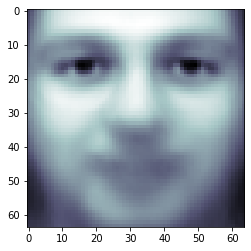

In [9]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone);

In the following code we determine that we have 4096 entries of 150 components. 

In [10]:
print(pca.components_.shape)

(144, 4096)


It is also interesting to visualize these principal components. In the following we create a new figure canvas and then plot 30 entries from our new PCA image space. Please note that the components are ordered by their importance. So in the plot below we are looking at a visualisation of the top 30 components taken from the entire dataset. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features the nose, eyes, eyebrows, etc:

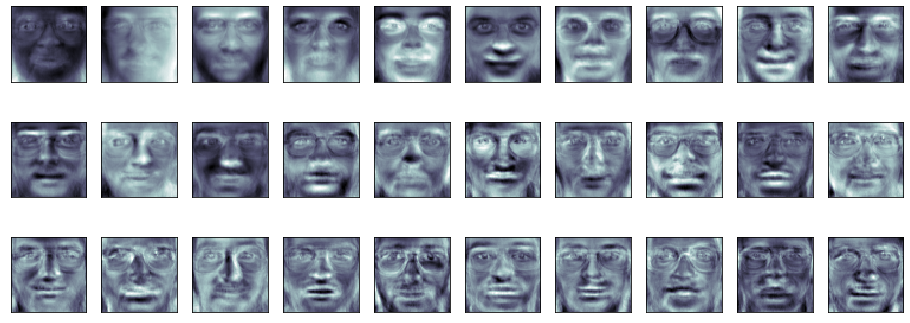

In [11]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)

But as we said earlier, we want to reduce our original dataset from having 4096 pixels to 144. This means we need to transform our original dataset. With the PCA projection computed above, we can now project our original training and test data onto the PCA basis:

In [12]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 144)
(100, 144)


These projected components correspond to factors in a linear combination of component images such that the combination approaches the original face. Let us plot the first image from our original data and the one now mapped onto this new space:

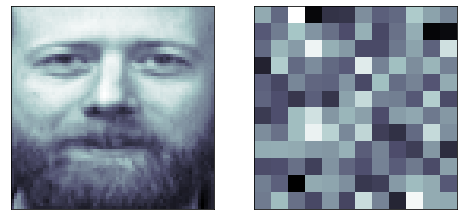

In [14]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax1.imshow(X_train[0].reshape(faces.images[0].shape), cmap=plt.cm.bone)
ax2 = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax2.imshow(np.reshape(X_train_pca[0], (12, 12)), cmap=plt.cm.bone)

Dosnt seem like we can extract any useful information from this right? Bare in mind I have simply visualised the new PCA space on a 2D grid so you can conceptually compare the two. Let us see how a classifier now performs.

## 4) Training the classifier <a name="Training"></a>

In this example we use a Support Vector Machine, or SVM, to train on the training data and then predict on the test data. We evaluate the performance of our classifer on this test data. 

In this course we do not go into details about the range of classifiers available, but you might find the [Scikit-learn webpage as an introduction](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). Indeed, the figure below illustrates the performance of a range of classifiers in seperating 2D data according to two distinct types, coloured as red and blue points.

<img src="../images/sphx_glr_plot_classifier_comparison_001.png">




In the following code we import the SVM from Scikit-learn and then create an instance of a model with values for two parameters 'C' and 'gamma'. We do not go into detail in this course about these parameters, but when training a classifier one normally works through a range of model hyperparameters to find the model with the best generic performance. A hyperperamter is a parameter whose value is used to control the learning process. 

Once we import the model, we can fit the model to the input 'X_train_pca' and output 'y_train' using the property of our model ```python clf.fit(X_train_pca, y_train) ```. This returns an instance of our modek that has been fit to the training data. 

In [15]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Finally, we can evaluate how well this classification did.  First, we might plot a
few of the test-cases with the labels learned from the training set:

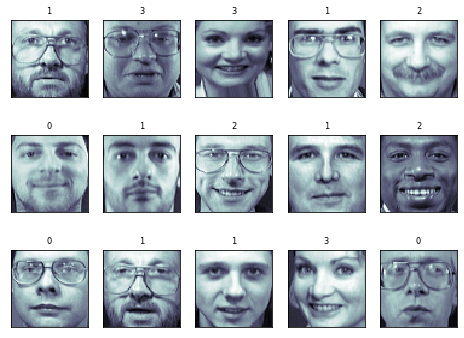

In [16]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)

The classifier is correct on an impressive number of images given the simplicity
of its learning model!  Using a linear classifier on 150 features derived from
the pixel-level data, the algorithm correctly identifies a large number of the
people in the images.

Again, we can
quantify this effectiveness using one of several measures from the ``sklearn.metrics``
module.  First we can do the classification report, which shows the precision,
recall and other measures of the "goodness" of the classification:

In [23]:
from sklearn import metrics

X_total_input = pca.transform(faces.data)
prediction = clf.predict(X_total_input)
cm=metrics.confusion_matrix(prediction,faces.target)
print(cm)

[[ 8  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]


Another interesting metric is the *confusion matrix*, which indicates how often
any two items are mixed-up.  The confusion matrix of a perfect classifier
would only have nonzero entries on the diagonal, with zeros on the off-diagonal.

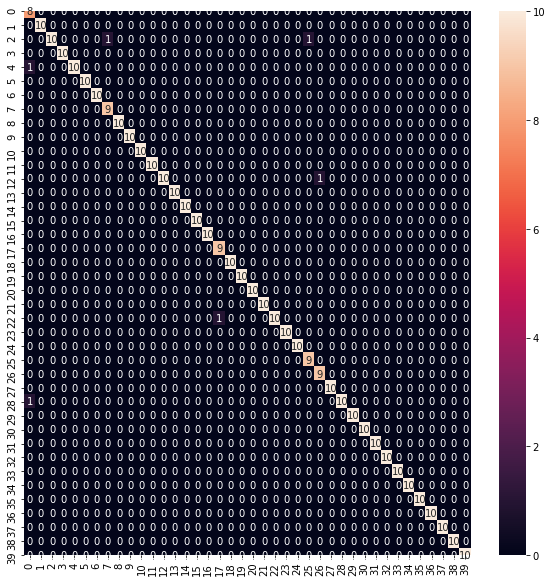

In [26]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm, index = [i for i in range(40)],
                  columns = [i for i in range(40)])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)
plt.show()

## A Quick Note on Facial Recognition

Here we have used PCA "eigenfaces" as a pre-processing step for facial recognition.
The reason we chose this is because PCA is a broadly-applicable technique, which can
be useful for a wide array of data types.  Research in the field of facial recognition
in particular, however, has shown that other more specific feature extraction methods
are can be much more effective.